Homework 3

Yanxin Luo

In [31]:
# version of library
# pandas==2.2.3
# sklearn=1.2.2
# numpy==1.26.4

# Attention: Difference in library version may cause slight difference of answer.

Q1

$1 - p(X) = \frac{1 + e^{\beta_0 + \beta_1 X} - e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} = \frac{1}{1 + e^{\beta_0 + \beta_1 X}}$

${1 + e^{\beta_0 + \beta_1 X}}=\frac{1}{1 - p(X) }$

$e^{\beta_0 + \beta_1 X}=\frac{p(X)}{1 - p(X)}$


Q2 (a)

Available observation percentage
$(0.65-0.55)/(1-0)=0.1$

Q2 (b)

Available observation percentage
$(0.65-0.55)*(0.4-0.3)/(1-0)*(1-0)=0.01$

Q2 (c)

Available observation percentage
$0.1^p$

Q2 (d)

KNN makes predictions based on the closest training observations to a given test point. However, as the number of features $p$ increases, fraction of training observations that are "near" any given test observation decreases exponentially, making KNN increasingly ineffective.

Q2 (e)

When p=1, length=$0.1$

When p=2, length=$0.1^\frac{1}{2}$

When p=100, length=$0.1^\frac{1}{100}$

Q3 (a)

Odds: $\frac{p(x)}{1 - p(x)}=0.37$

$p(x)=\frac{0.37}{1.37}\approx{0.27007}$

Q3 (b)

$p(x)=0.16$

Odds: $\frac{p(x)}{1 - p(x)}\approx{0.1904}$

Q4 (a)

Log odds of orange versus apple: $\frac{\hat{Pr}(Y=orange | X=x)}{1-\hat{Pr}(Y=orange | X=x)}=exp(\hat{\beta}_0+\hat{\beta}_1*x)$

$log(exp(\hat{\beta}_0+\hat{\beta}_1*x))=\hat{\beta}_0+\hat{\beta}_1*x$

This result shows that my model assumes a linear relationship between log-odds and predictor.

Q4 (b)

Log odds of orange versus apple: $\frac{\hat{Pr}(Y=orange| X=x)}{1-\hat{Pr}(Y=orange | X=x)}=\frac{exp(\hat{\alpha}_{orange0}+\hat{\alpha}_{orange1}*x)}{exp(\hat{\alpha}_{apple0}+\hat{\alpha}_{apple1}*x)}$

$log(\frac{\hat{Pr}(Y=orange| X=x)}{1-\hat{Pr}(Y=orange | X=x)})=(\hat{\alpha}_{orange0}-\hat{\alpha}_{apple0})+(\hat{\alpha}_{orange1}-\hat{\alpha}_{apple1})*x$

This shows that in the softmax model, log odds are still a linear function of x, but coefficients are differences between the parameters associated with each class.

Q4 (c)

That means 

$\hat{\alpha}_{orange0}-\hat{\alpha}_{apple0}=\hat{\beta}_0=2$ 

$\hat{\alpha}_{orange1}-\hat{\alpha}_{apple1}=\hat{\beta}_1=-1$ 


Q5 (a)

The model follows:

$\hat{p(X)}=\frac{exp(\beta_0+\beta_1x_1+\beta_2x_2)}{1+exp(\beta_0+\beta_1x_1+\beta_2x_2)}$
,  where $\beta_0=-4, \beta_1=0.05, \beta_2=1$

When $x_1=5$ and $x_2=3.5$,  $\hat{p(X)}=\frac{exp(-0.25)}{1+exp(-0.25)}\approx{0.43782}$

Q5（b）

Odds of getting an A: $\frac{\hat{p(X)}}{1-\hat{p(X)}}\approx{0.7793}$

Q5 (c)

Solve $\frac{exp(\beta_0+\beta_1x_1+\beta_2x_2)}{1+exp(\beta_0+\beta_1x_1+\beta_2x_2)}=0.5$, where $x_2=3.5$

So, $x_1=10$

Q6 (a)



In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [11]:
college_train=pd.read_csv("./dataset/college_train.csv")
college_test=pd.read_csv("./dataset/college_test.csv")

In [12]:
Y_train=college_train["Private"].map({"Yes": 1, "No": 0})
X_train=college_train.drop(columns=["Private","Name"])

In [13]:
Y_test=college_test["Private"].map({"Yes": 1, "No": 0})
X_test=college_test.drop(columns=["Private","Name"])

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
y_probs=model.predict_proba(X_test)
nll=-np.sum(np.log(y_probs[np.arange(len(Y_test)), Y_test]))
print(f"Negative Log-Likelihood: {nll:.4f}")

Negative Log-Likelihood: 16.7247


Q6 (b)

In [16]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of "Yes"
y_pred = ["Yes" if p > 0.5 else "No" for p in y_probs]

In [17]:
y_pred_binary = [1 if label == "Yes" else 0 for label in y_pred]  

In [18]:
tn,fp,fn,tp=confusion_matrix(Y_test, y_pred_binary).ravel()

FPR=fp/(fp+tn)  # False Positive Rate
TPR=tp/(tp+fn)  # True Positive Rate (Recall)
FNR=fn/(fn+tp)  # False Negative Rate
TNR=tn/(tn+fp)

print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")

False Positive Rate (FPR): 0.0303
True Positive Rate (TPR): 0.9468
False Negative Rate (FNR): 0.0532
True Negative Rate (TNR): 0.9697


Q6 (c)



In [19]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of "Yes"
y_pred = ["Yes" if p > 0.9 else "No" for p in y_probs]
y_pred_binary = [1 if label == "Yes" else 0 for label in y_pred]  

In [20]:
tn,fp,fn,tp=confusion_matrix(Y_test, y_pred_binary).ravel()

FPR=fp/(fp+tn) 
TPR=tp/(tp+fn) 
FNR=fn/(fn+tp)  
TNR=tn/(tn+fp)

print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")

False Positive Rate (FPR): 0.0303
True Positive Rate (TPR): 0.7766
False Negative Rate (FNR): 0.2234
True Negative Rate (TNR): 0.9697


Q6 (d)

In [21]:
import matplotlib.pyplot as plt

In [22]:
y_probs = model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 101)  # Values from 0 to 1 with step 0.01
fpr_list = []
tpr_list = []

In [23]:
for t in thresholds:
    y_pred = (y_probs>t).astype(int) 

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    

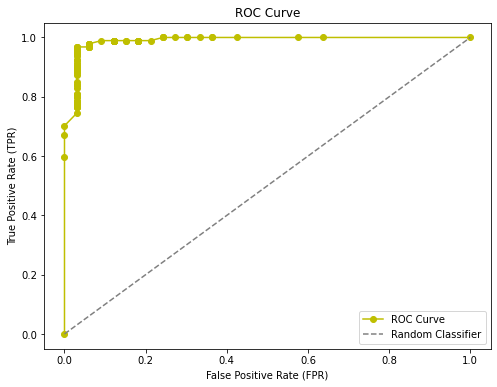

In [24]:
plt.figure(figsize=(8,6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', color='y', label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

Q6 (e)

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
y_probs = model.predict_proba(X_test)[:, 1] 
auc_score = roc_auc_score(Y_test, y_probs)
print(f"ROC AUC Score: {auc_score:.4f}")

ROC AUC Score: 0.9877


In [27]:
import numpy
print(numpy.__version__)
#2.2.3

1.26.4


In [28]:
# !pip install pandas==2.2.3

In [29]:
import sklearn
print(sklearn.__version__)

1.2.2


In [30]:
import pandas
print(pandas.__version__)

2.2.3
